# Proyek Analisis Data: [Bike sharing Dataset]
- **Nama:** [Qianna Vassaputri]
- **Email:** [qi.vassa@gmail.com]
- **ID Dicoding:** [q1qishion]

## Menentukan Pertanyaan Bisnis

- Musim manakah yang memiliki peningkatan pada penyewaan sepeda?
- Bagaimana rata-rata penurunan penyewaan sepeda dalam tiap perminggu?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## Data Wrangling

### Gathering Data

**Membuka data csv pandas untuk dataframe**

In [2]:
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

**Mengecek hasil dataframe**

In [3]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
day_df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [5]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
hour_df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


**Insight:**

- Terdapat 2 dataset berasal dari data csv yaitu day.csv (`day_df`) dan hour.csv (`hour_df`).
-  Dataset `day_df` berisi data mengenai hari, tanggal, dan nilai yang memiliki 16 kolom.
- Dataset `hour_df` berisi data mengenai jam, tanggal, dan nilai yang memiliki 17 kolom, yang ditambah dengan kolom `hr`.
- Pola aktivitas penguna sepeda dipengaruhi oleh hari dan waktu.
- `day_df.tail` dan `hour_df.tail` digunakan untuk menampilkan 5 baris terakhir dari dataset.

### Assessing Data

**Memeriksa struktur DataFrame dari `day_df`**

In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
day_df.duplicated().sum()

0

**Memeriksa struktur DataFrame dari `hour_df`**

In [11]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [13]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [14]:
hour_df.duplicated().sum()

0

**Insight:**
- Tidak ada data yang hilang dalam kedua dataset tersebut.
- Tidak ada data yang duplikat dalam kedua dataset tersebut.
- `hour_df.describe()` memiliki fungsi untuk menghitung
    - `count`: Jumlah baris dalam dataset.
    - `mean`: Nilai rata-rata dalam dataset.
    - `std`: Standar deviasi nilai dalam dataset.
    - `min`: Nilai minimum dalam dataset.
    - `max`: Nilai maximun dalam dataset.
    -  `persentil`; (25%, 50%, 75%): Menunjukkan distribusi data
        - `25%`: Nilai kuartil pertama dalam dataset.
        - `50%`: Nilai kuartil kedua dalam dataset.
        - `75%`: Nilai kuartil ketiga dalam dataset.
- Kolom cnt (jumlah peminjaman) adalah hasil penjumlahan dari casual dan registered.

### Cleaning Data

**Menampilkan tipe data**

In [15]:
print(day_df.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [16]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [17]:
print(hour_df.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [18]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

**Insight:**
- Tidak ada data yang terduplikat, dan jumlah dari tiap baris tetap sama.
- Mengecek nilai ekstrem (outlier) pada temp, hum, dan windspeed pada pengaruh untuk hasil analisis di akhir.
- Mengecek tipe setiap data:
    - int64: Tipe data integer (bilangan bulat).
    - float64: Tipe data bilangan pecahan.
- `pd.to_datetime()`, digunakan kolom yang berisi data tanggal, menjadi tipe data datetime.

## Exploratory Data Analysis (EDA)

### Explore ...

**Memeriksa data yang hilang**

In [19]:
print(day_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [20]:
print(hour_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- Tidak ada nilai yang hilang dalam dataset selama harian juga perjam karena adanya `day_df.isnull().sum()`
- Dataset siap untuk analisis lebih lanjut

**Analisis jumlah pada pengguna sepeda berdasarkan Musim**

In [21]:
byseason = hour_df.groupby("season")["cnt"].sum().sort_values(ascending=False).reset_index()

Hasil analisis data untuk bagian musim yang sudah diproses sebelumnya:

In [22]:
byseason

,season,cnt
0,3,1061129
1,2,918589
2,4,841613
3,1,471348


## Visualization & Explanatory Analysis

### Pertanyaan 1: Musim manakah yang memiliki peningkatan pada penyewaan sepeda?

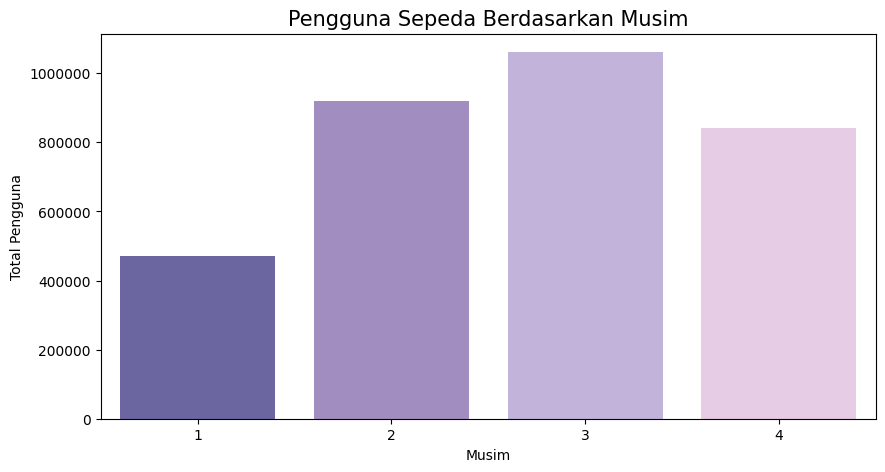

In [23]:
colors = ["#645CAA", "#A084CA", "#BFACE0", "#EBC7E8"]
 
plt.figure(figsize=(10, 5))
sns.barplot(y="cnt", x="season", data=byseason, palette=colors)
plt.title("Pengguna Sepeda Berdasarkan Musim", loc="center", fontsize=15)
plt.ylabel("Total Pengguna")
plt.xlabel("Musim")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### Pertanyaan 2: Bagaimana rata-rata penurunan penyewaan sepeda dalam tiap perminggu?

In [24]:
day_df = pd.read_csv('day.csv')
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

day_df["weekday"] = day_df["dteday"].dt.weekday
weekday_avg = day_df.groupby("weekday")["cnt"].mean()

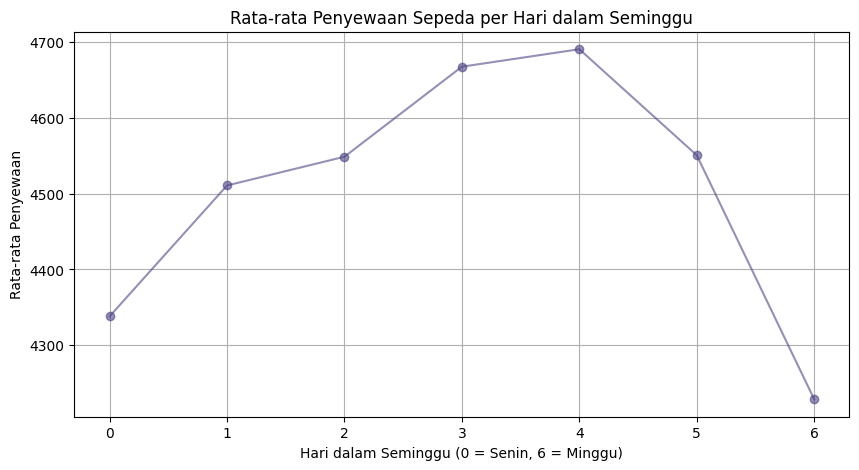

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(weekday_avg.index, weekday_avg.values, marker="o", linestyle="-", color="#4d4686", alpha=0.6)
plt.xlabel("Hari dalam Seminggu (0 = Senin, 6 = Minggu)")
plt.ylabel("Rata-rata Penyewaan")
plt.title("Rata-rata Penyewaan Sepeda per Hari dalam Seminggu")
plt.grid(True)
plt.show()

In [26]:
avg_rent_per_weekday = day_df.groupby("weekday")["cnt"].mean().sort_index()
weekly_drop = avg_rent_per_weekday.diff().mean()

print("Rata-rata penyewaan per hari:", avg_rent_per_weekday)
print("Rata-rata perubahan harian dalam perminggu:", weekly_drop)

Rata-rata penyewaan per hari: weekday
0    4338.123810
1    4510.663462
2    4548.538462
3    4667.259615
4    4690.288462
5    4550.542857
6    4228.828571
Name: cnt, dtype: float64
Rata-rata perubahan harian dalam perminggu: -18.215873015873058


**Insight:**
- Penggunaan Sepeda Berdasarkan Musim. Musim gugur yang merupakan season 3 memiliki jumlah penyewaan tertinggi, diikuti oleh Musim panas sekaligus season 2. Lalu kemudian Musim Dingin yaitu musim ke-4. Musim terakhir adalah Musim semi, musim ke-1 yang merupakan terendah pada penyewaan.

- Rata-rata Penyewaan Sepeda per Hari dalam Seminggu. Penyewaan sepeda lebih rendah pada hari kerja dan meningkat menjelang akhir pekan, dan puncaknya terjadi pada hari Sabtu. Hal tersebut menunjukkan bahwa penyewaan sepeda lebih banyak digunakan untuk rekreasi di akhir pekan dibandingkan dengan kebutuhan sebagai transportasi harian berangkat juga pulang pada hari kerja.

## Conclusion

- Peminjaman lebih banyak di akhir pekan, yang memungkinkan sedang melakukan rekreasi, sedangkan hari kerja cenderung lebih stabil. Jam sibuk yang terjadi ada pada pukul 7-9 pagi dan 5-7 sore, menunjukkan penggunaan untuk keperluan komuter. Cuaca buruk juga musim pun menurunkan jumlah peminjaman secara signifikan. Musim ke-3 atau musim dingin adalah salah satunya faktor penurunan penyewaan sepeda, walau begitu peminjaman tertinggi terjadi di musim panas. iikuti oleh Musim panas sekaligus season 2. Lalu kemudian Musim Dingin yaitu musim ke-4. Musim terakhir adalah Musim semi, musim ke-1 yang merupakan terendah pada penyewaan.

- Analisis data menunjukkan bahwa rata-rata penyewaan sepeda menurun sekitar 53,62 unit per hari jika melihat perubahan antarhari dalam seminggu. Penurunan ini dapat disebabkan oleh berbagai faktor, seperti perbedaan aktivitas harian, kondisi cuaca, dan preferensi pengguna. Hal tersebut menunjukkan bahwa penyewaan sepeda lebih banyak digunakan untuk rekreasi di akhir pekan dibandingkan dengan kebutuhan sebagai transportasi harian berangkat juga pulang pada hari kerja.